# Import necessary libraries

In [1]:
import pandas as pd # data operation and data Wrangling
import numpy as np # number operation in array
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns # data visualisation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder # standardization , encoding for feature scaling
from sklearn.model_selection import GridSearchCV # for hyperparameter tunning
from sklearn.model_selection import train_test_split  # split the data into train and test
from sklearn.ensemble import RandomForestClassifier # random forest
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.linear_model import LogisticRegression #logistic
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score,classification_report,roc_curve # for evaluation metric

# Load the CSV data

In [2]:
df = pd.read_csv(r"/content/diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Data Preparation

In [3]:
#Split 1,0
df_0 = df[df['diabetes'] == 0]
df_1 = df[df['diabetes'] == 1]

# take 10% of 0
df_0_sample = df_0.sample(frac=0.10, random_state=42)

# take all 1
df_1_sample = df_1

# combine
df_sampled = pd.concat([df_0_sample, df_1_sample])

# Shuffle
df_sampled = df_sampled.sample(frac=1.0, random_state=42).reset_index(drop=True)

In [4]:
df_sampled.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,68.0,1,0,never,31.74,4.5,100,0
1,Female,43.0,0,0,never,27.32,5.7,140,0
2,Female,79.0,0,0,No Info,36.15,4.8,90,0
3,Male,59.0,0,0,former,26.57,4.0,100,0
4,Female,55.0,0,0,never,44.26,9.0,159,1
5,Female,34.0,0,0,No Info,29.23,5.8,140,0
6,Male,1.4,0,0,No Info,13.65,5.7,155,0
7,Female,67.0,0,0,No Info,35.54,6.5,220,1
8,Male,54.0,0,0,never,26.97,5.0,126,0
9,Female,70.0,1,0,current,27.32,5.7,130,1


In [5]:
df_sampled.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
17645,Female,80.0,0,0,never,29.26,6.2,155,1
17646,Male,52.0,1,0,former,28.59,8.8,140,1
17647,Female,39.0,0,0,never,22.44,4.8,145,0
17648,Male,26.0,0,0,No Info,27.32,6.5,80,0
17649,Male,78.0,0,0,never,23.45,6.1,159,1


In [6]:
df_sampled.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [7]:
df_sampled.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
smoking_history,object
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


In [8]:
print(df_sampled.isnull().sum())# check missing values

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [9]:
df_sampled.nunique() # check values possible in each feature

,0
gender,3
age,102
hypertension,2
heart_disease,2
smoking_history,6
bmi,3317
HbA1c_level,18
blood_glucose_level,18
diabetes,2


In [10]:
df_sampled[df_sampled.duplicated()].count() #check duplicated values

,0
gender,69
age,69
hypertension,69
heart_disease,69
smoking_history,69
bmi,69
HbA1c_level,69
blood_glucose_level,69
diabetes,69


In [11]:
df_sampled.drop_duplicates(inplace=True) #drop duplicated values

In [12]:
df_sampled.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,17581.000000,17581.000000,17581.000000,17581.000000,17581.000000,17581.000000,17581.000000
mean,50.204846,0.148399,0.086514,29.333604,6.138445,162.080428,0.482453
std,21.581856,0.355505,0.281129,7.390853,1.281263,56.615940,0.499706
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,35.000000,0.000000,0.000000,25.770000,5.700000,130.000000,0.000000
50%,54.000000,0.000000,0.000000,27.320000,6.100000,155.000000,0.000000
75%,67.000000,0.000000,0.000000,32.650000,6.600000,200.000000,1.000000
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.000000


# data visualization

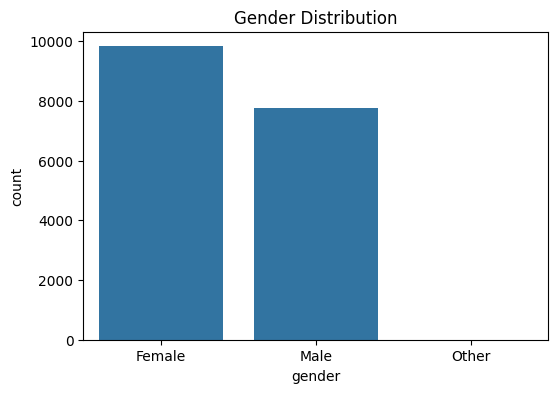

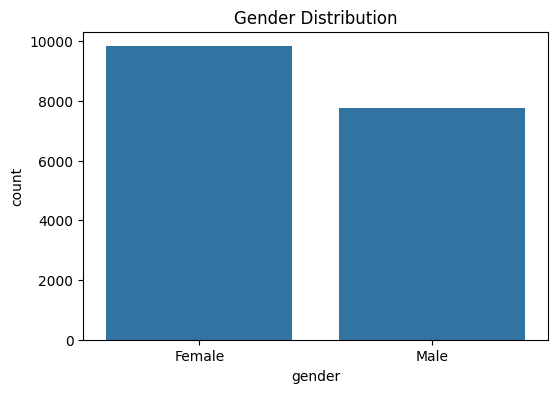

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x="gender", data=df_sampled)
plt.title("Gender Distribution")
df_sampled["gender"]=df_sampled["gender"].str.replace("Other","Female")
plt.figure(figsize=(6,4))
sns.countplot(x="gender", data=df_sampled)
plt.title("Gender Distribution")
plt.show()

Text(0.5, 1.0, 'DiabetesDistribution')

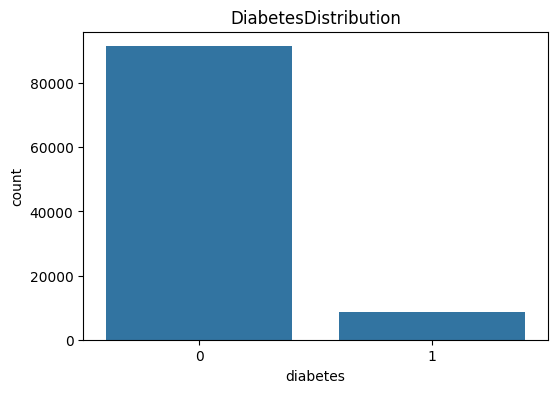

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x="diabetes", data=df)
plt.title("DiabetesDistribution")

Text(0.5, 1.0, 'DiabetesDistribution')

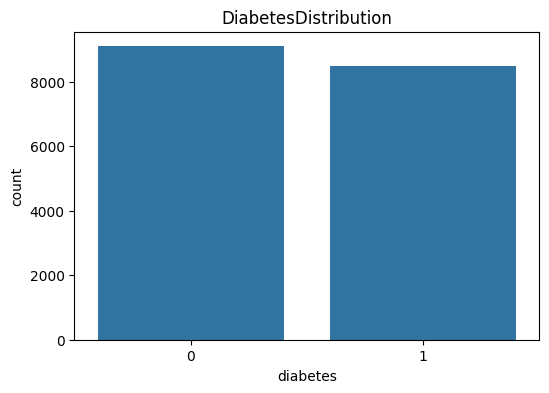

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x="diabetes", data=df_sampled)
plt.title("DiabetesDistribution")

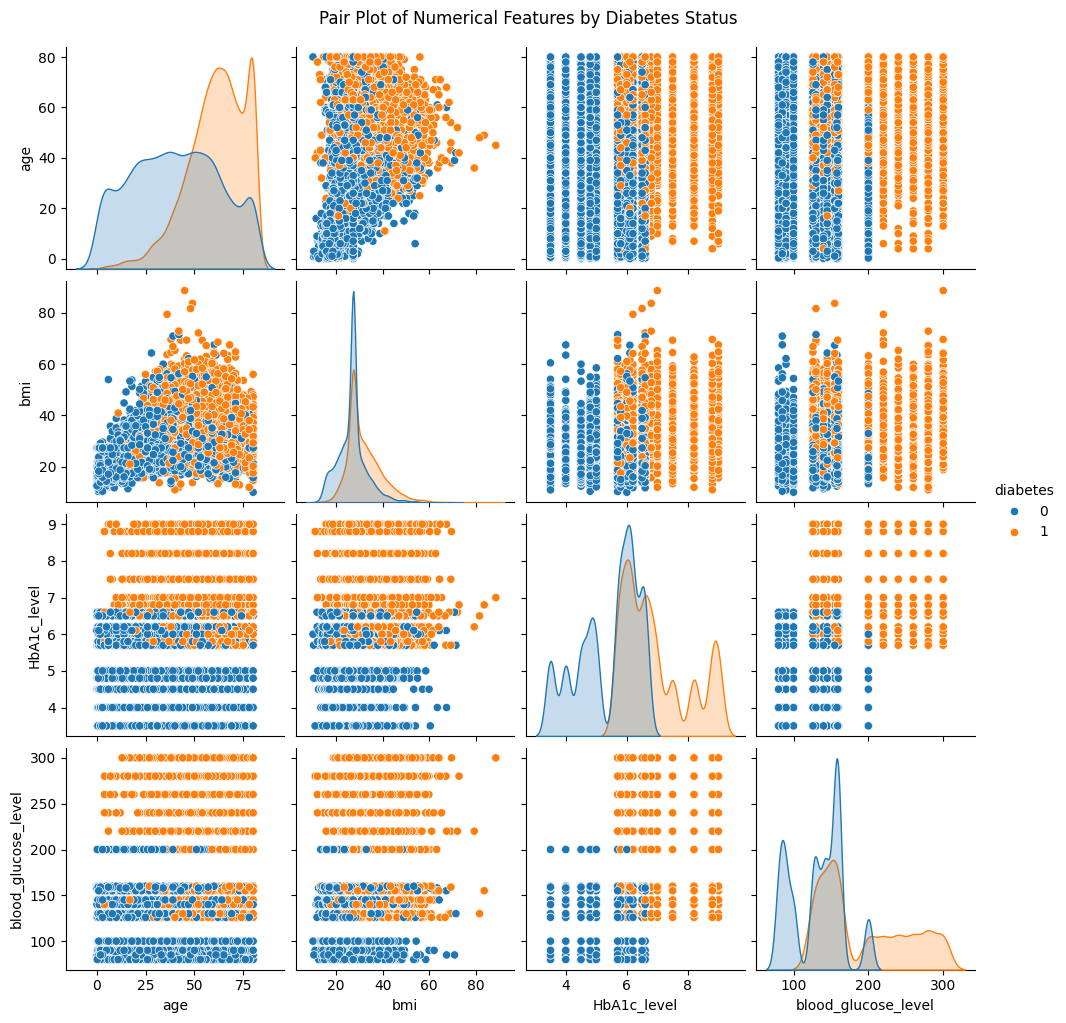

In [16]:
sns.pairplot(df_sampled[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']], hue='diabetes')
plt.suptitle('Pair Plot of Numerical Features by Diabetes Status', y=1.02) # Adjust title position
plt.show()


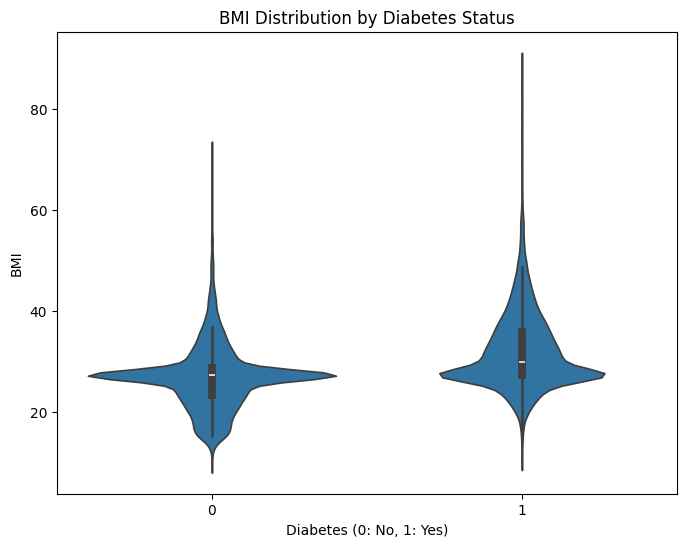

In [17]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='diabetes', y='bmi', data=df_sampled)
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('BMI')
plt.show()

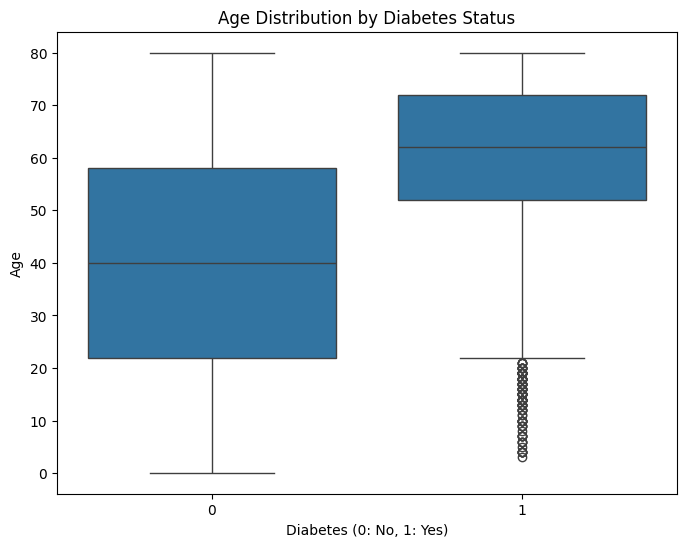

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='age', data=df_sampled)
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()

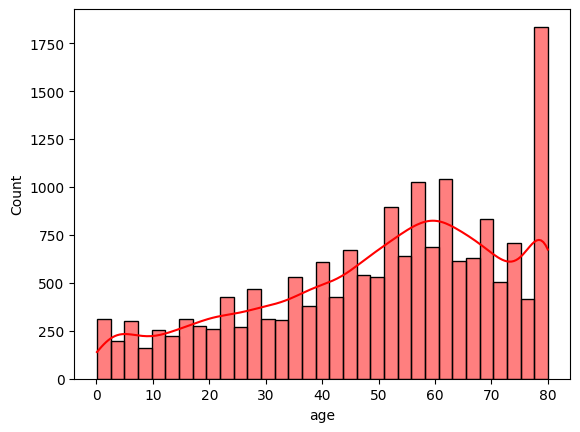

In [19]:
sns.histplot(df_sampled['age'],kde=True,color='red')
plt.show()

/tmp/ipython-input-2093500905.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='smoking_history', y='bmi', data=df, ci=None) # ci=None removes confidence intervals


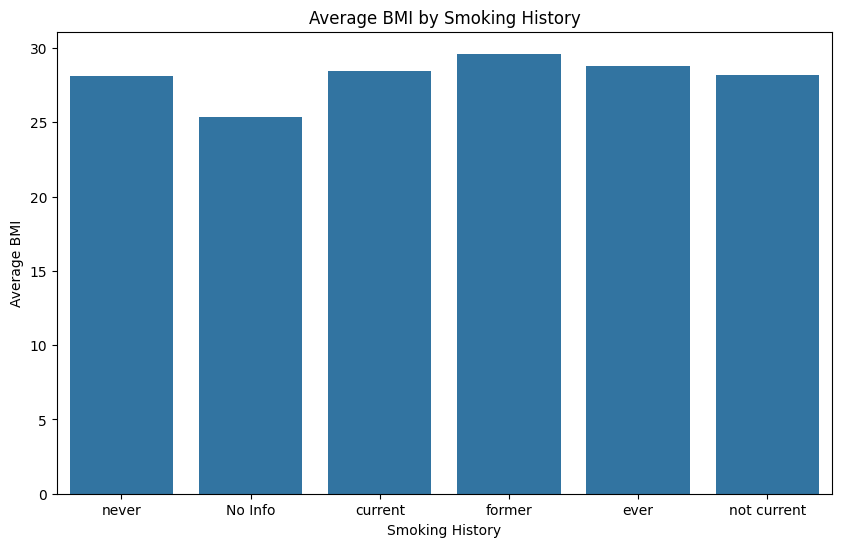

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='smoking_history', y='bmi', data=df, ci=None) # ci=None removes confidence intervals
plt.title('Average BMI by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Average BMI')
plt.show()

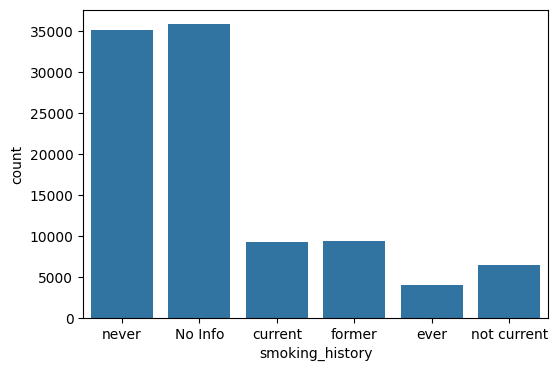

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x="smoking_history", data=df)
plt.show()

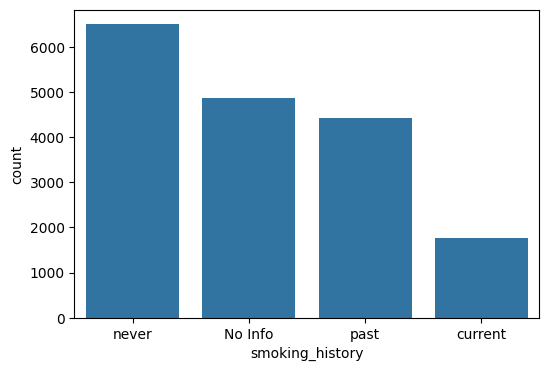

In [22]:
df_modified = df_sampled.copy()
df_modified['smoking_history'] = df_modified['smoking_history'].replace({
    'former': 'past',
    'ever': 'past',
    'not current': 'past',
})
plt.figure(figsize=(6,4))
sns.countplot(x="smoking_history", data=df_modified)
plt.show()

<Axes: xlabel='age', ylabel='diabetes'>

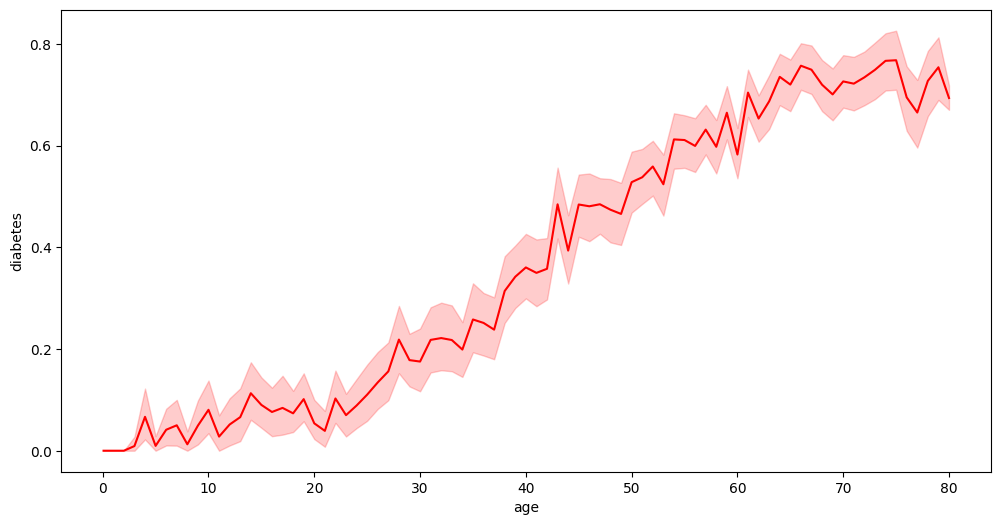

In [23]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df_modified['age'],y=df_modified['diabetes'],color='red')

In [24]:
df_modified['smoking_history'].unique()

array(['never', 'No Info', 'past', 'current'], dtype=object)

# ENCODING


In [25]:
# Convert categorical variables to numeric
le_gender = LabelEncoder()
le_smoking = LabelEncoder()
df_modified['gender'] = le_gender.fit_transform(df_sampled['gender'])
df_modified['smoking_history'] = le_smoking.fit_transform(df_modified['smoking_history'])

In [26]:
df_modified

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,68.0,1,0,2,31.74,4.5,100,0
1,0,43.0,0,0,2,27.32,5.7,140,0
2,0,79.0,0,0,0,36.15,4.8,90,0
3,1,59.0,0,0,3,26.57,4.0,100,0
4,0,55.0,0,0,2,44.26,9.0,159,1
...,...,...,...,...,...,...,...,...,...
17645,0,80.0,0,0,2,29.26,6.2,155,1
17646,1,52.0,1,0,3,28.59,8.8,140,1
17647,0,39.0,0,0,2,22.44,4.8,145,0
17648,1,26.0,0,0,0,27.32,6.5,80,0


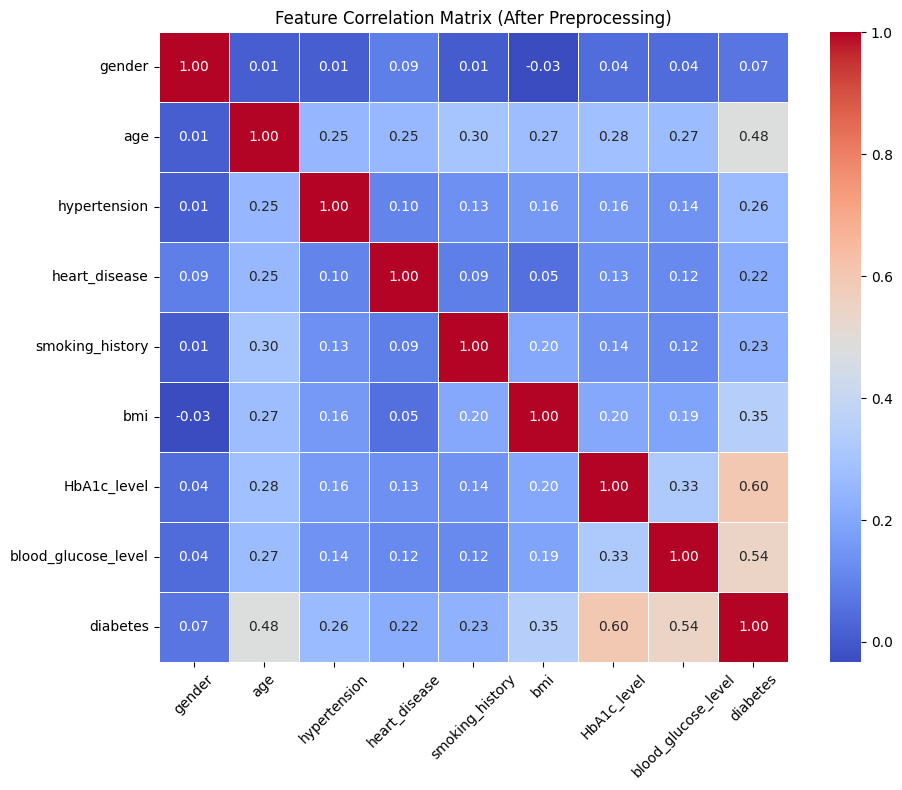

In [27]:
# Compute the correlation matrix
corr_matrix = df_modified.corr()

# Set up the plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

# Title and display
plt.title("Feature Correlation Matrix (After Preprocessing)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Scalling

In [28]:
numerical_cols = ['age','bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Split data into features and target


In [29]:
X = df_modified.drop('diabetes',axis=1)
y = df_modified['diabetes']

# Split data into training and testing sets

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

#  KNN grid

In [31]:

# Define KNN model and parameter grid
model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan, 2: Euclidean
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit and predict
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

# Print results
print("KNN Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")


'\n# Define KNN model and parameter grid\nmodel = KNeighborsClassifier()\nparam_grid = {\n    \'n_neighbors\': [3, 5, 7, 9],\n    \'weights\': [\'uniform\', \'distance\'],\n    \'p\': [1, 2]  # 1: Manhattan, 2: Euclidean\n}\n\n# Perform GridSearchCV\ngrid_search = GridSearchCV(\n    estimator=model,\n    param_grid=param_grid,\n    cv=5,\n    scoring=\'accuracy\',\n    n_jobs=-1\n)\n\n# Fit and predict\ngrid_search.fit(X_train, y_train)\ny_pred = grid_search.predict(X_test)\n\n# Print results\nprint("KNN Results:")\nprint(f"Best Parameters: {grid_search.best_params_}")\nprint(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")\nprint(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")\n'

In [32]:
knn_model= KNeighborsClassifier(n_neighbors = 9, p= 1, weights= 'distance')
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')

In [33]:
# Evaluate model on training and test sets
train_pred = knn_model.predict(X_train)
test_pred = knn_model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("\nModel Performance:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification report:")
print(classification_report(y_test, test_pred))


Model Performance:
Training Accuracy: 0.9995
Test Accuracy: 0.8675

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1830
           1       0.86      0.87      0.86      1687

    accuracy                           0.87      3517
   macro avg       0.87      0.87      0.87      3517
weighted avg       0.87      0.87      0.87      3517



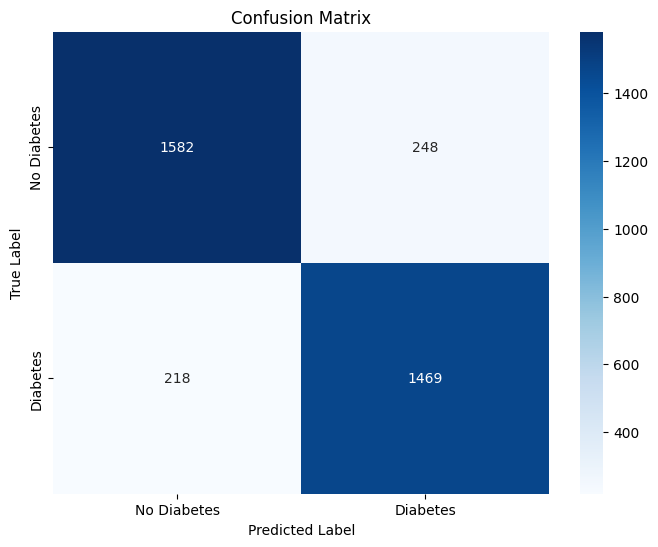

In [34]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# decision tree grid

In [35]:

#Define Decision Tree model and parameter grid
model = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit and predict
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

# Print results
print("Decision Tree Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")


'\n#Define Decision Tree model and parameter grid\nmodel = DecisionTreeClassifier(random_state=42)\nparam_grid = {\n    \'max_depth\': [3, 5, 7, None],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'criterion\': [\'gini\', \'entropy\']\n}\n\n# Perform GridSearchCV\ngrid_search = GridSearchCV(\n    estimator=model,\n    param_grid=param_grid,\n    cv=5,\n    scoring=\'accuracy\',\n    n_jobs=-1\n)\n\n# Fit and predict\ngrid_search.fit(X_train, y_train)\ny_pred = grid_search.predict(X_test)\n\n# Print results\nprint("Decision Tree Results:")\nprint(f"Best Parameters: {grid_search.best_params_}")\nprint(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")\nprint(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")\n'

In [36]:
dt_model = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, min_samples_leaf= 1, min_samples_split= 2)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [37]:
# Evaluate model on training and test sets
train_pred =dt_model.predict(X_train)
test_pred =dt_model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("\nModel Performance:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification report:")
print(classification_report(y_test, test_pred))


Model Performance:
Training Accuracy: 0.9019
Test Accuracy: 0.9042

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1830
           1       0.88      0.93      0.90      1687

    accuracy                           0.90      3517
   macro avg       0.90      0.91      0.90      3517
weighted avg       0.91      0.90      0.90      3517



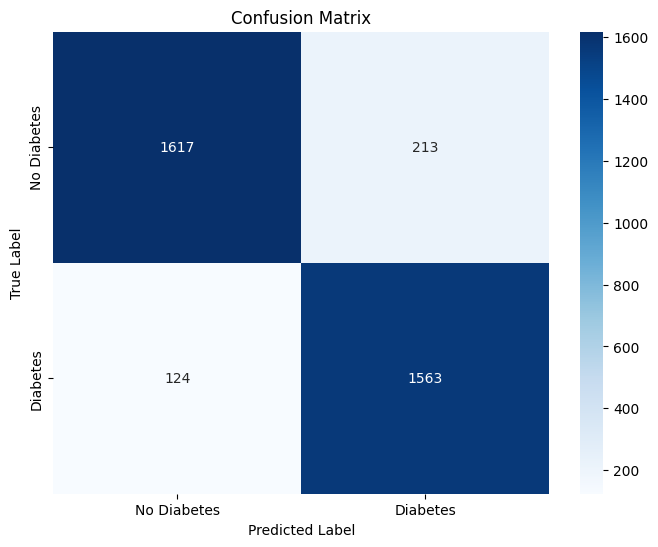

In [38]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Logistic regression grid

In [39]:

#Define Logistic Regression model and parameter grid
model = LogisticRegression(random_state=42, max_iter=1000)
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit and predict
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

# Print results
print("Logistic Regression Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")


'\n#Define Logistic Regression model and parameter grid\nmodel = LogisticRegression(random_state=42, max_iter=1000)\nparam_grid = {\n    \'C\': [0.1, 1.0, 10.0],\n    \'penalty\': [\'l1\', \'l2\'],\n    \'solver\': [\'liblinear\', \'saga\']\n}\n\n# Perform GridSearchCV\ngrid_search = GridSearchCV(\n    estimator=model,\n    param_grid=param_grid,\n    cv=5,\n    scoring=\'accuracy\',\n    n_jobs=-1\n)\n\n# Fit and predict\ngrid_search.fit(X_train, y_train)\ny_pred = grid_search.predict(X_test)\n\n# Print results\nprint("Logistic Regression Results:")\nprint(f"Best Parameters: {grid_search.best_params_}")\nprint(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")\nprint(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")\n'

In [40]:
log_model = LogisticRegression(C= 1.0, penalty= 'l2', solver ='liblinear')
log_model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [41]:
# Evaluate model on training and test sets
train_pred = log_model.predict(X_train)
test_pred = log_model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("\nModel Performance:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification report:")
print(classification_report(y_test, test_pred))


Model Performance:
Training Accuracy: 0.8845
Test Accuracy: 0.8871

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1830
           1       0.88      0.89      0.88      1687

    accuracy                           0.89      3517
   macro avg       0.89      0.89      0.89      3517
weighted avg       0.89      0.89      0.89      3517



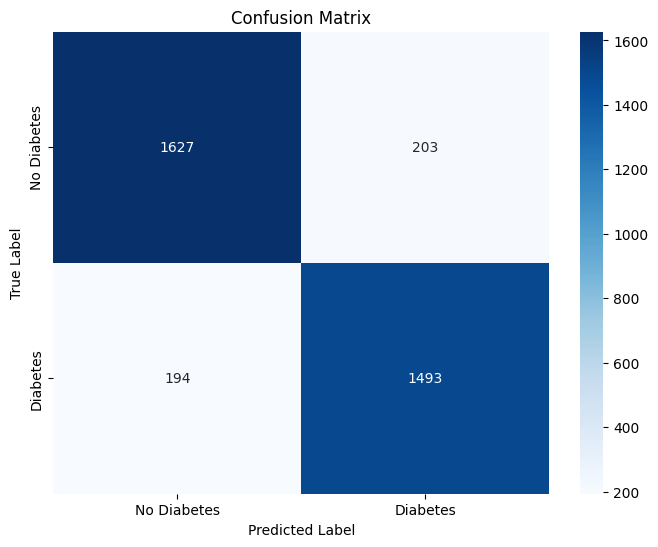

In [42]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

#hyperparameter using grid search rf

In [43]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


'\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [5, 10, 15, None],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'sqrt\', \'log2\']\n}\n# Initialize Random Forest model\nrf = RandomForestClassifier(random_state=42)\n# Perform Grid Search with cross-validation\ngrid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)\ngrid_search.fit(X_train, y_train)\n\n# Get the best model\nbest_rf_model = grid_search.best_estimator_\nprint("\nBest Parameters:", grid_search.best_params_)\nprint("Best Cross-Validation Score:", grid_search.best_score_)\n'

#Random forest

In [44]:
rf_model = RandomForestClassifier( max_depth= 15, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split =5, n_estimators = 200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=200)

In [45]:
# Evaluate model on training and test sets
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("\nModel Performance:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification report:")
print(classification_report(y_test, test_pred))


Model Performance:
Training Accuracy: 0.9497
Test Accuracy: 0.9121

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1830
           1       0.90      0.92      0.91      1687

    accuracy                           0.91      3517
   macro avg       0.91      0.91      0.91      3517
weighted avg       0.91      0.91      0.91      3517



#best model

In [46]:
models = {
    "Logistic Regression": LogisticRegression(C= 1.0, penalty= 'l2', solver ='liblinear'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors = 9, p= 1, weights= 'distance'),
    "Random Forest": RandomForestClassifier(max_depth= 15, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split =5, n_estimators = 200),
    "Decision Tree":DecisionTreeClassifier(criterion= 'gini', max_depth= 7, min_samples_leaf= 1, min_samples_split= 2),
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    results.append({
        "Algorithm": name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by="Test Accuracy", ascending=False))

             Algorithm  Train Accuracy  Test Accuracy
2        Random Forest        0.949943       0.912141
3        Decision Tree        0.901877       0.904180
0  Logistic Regression        0.884457       0.887120
1  K-Nearest Neighbors        0.999502       0.867501


# Check for overfitting

In [47]:
print(f"Difference (Training - Test): {train_accuracy - test_accuracy:.4f}")
if train_accuracy - test_accuracy > 0.1:
    print("Warning: Potential overfitting detected (large gap between training and test accuracy).")
else:
    print("No significant overfitting detected.")

Difference (Training - Test): 0.0376
No significant overfitting detected.


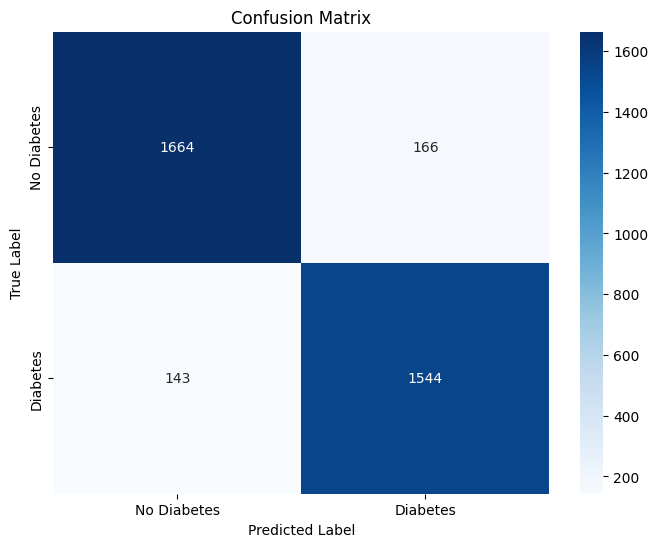

In [48]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

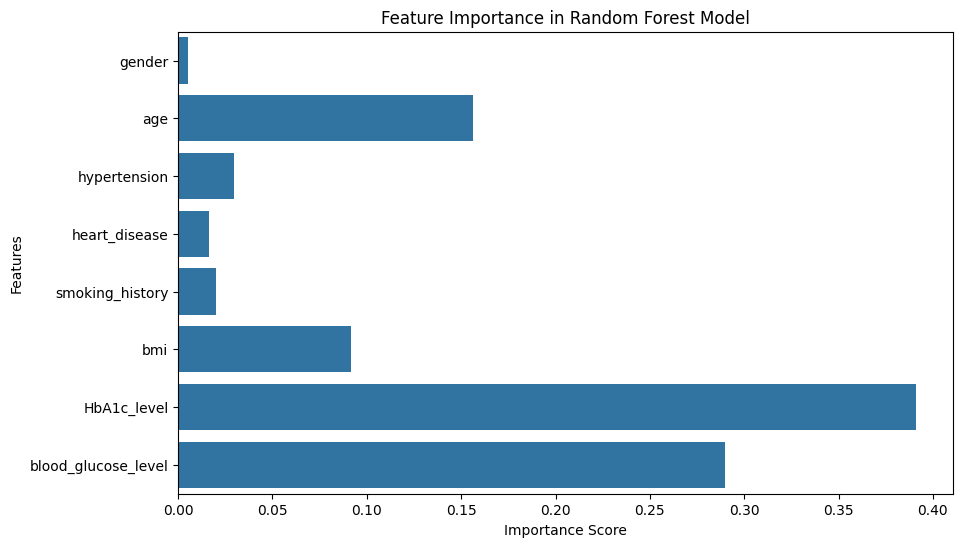

In [49]:
# Feature Importance
feature_importance = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


AUC-ROC: 0.91


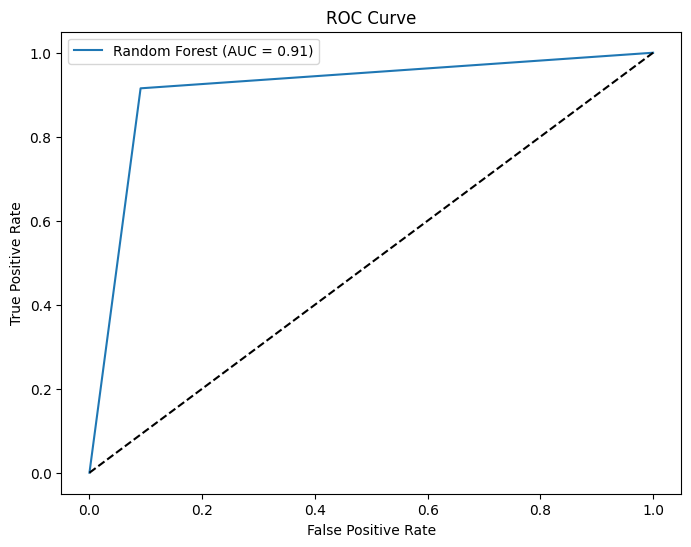

In [50]:
#AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, test_pred )
roc_auc = roc_auc_score(y_test, test_pred )
print(f"\nAUC-ROC: {roc_auc:.2f}")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# predictive model using Random Forest


In [51]:
import ipywidgets as widgets
from IPython.display import display, clear_output

def predict_diabetes(
    rf_model,
    gender,
    age,
    hypertension,
    heart_disease,
    smoking_history,
    bmi,
    hba1c_level,
    blood_glucose_level
):
    # Create DataFrame
    new_data = pd.DataFrame({
        'gender': [gender],
        'age': [age],
        'hypertension': [hypertension],
        'heart_disease': [heart_disease],
        'smoking_history': [smoking_history],
        'bmi': [bmi],
        'HbA1c_level': [hba1c_level],
        'blood_glucose_level': [blood_glucose_level]
    })

    # Make prediction
    prediction = rf_model.predict(new_data)
    prediction_proba = rf_model.predict_proba(new_data)

    # Return results as a dictionary
    result = {
        "prediction": "Diabetes" if prediction[0] == 1 else "No Diabetes",
        "probability_no_diabetes": f"{prediction_proba[0][0] * 100:.1f}%",
        "probability_diabetes": f"{prediction_proba[0][1] * 100:.1f}%",
        "risk_level": (
            "High" if prediction_proba[0][1] > 0.7
            else "Moderate" if prediction_proba[0][1] > 0.3
            else "Low"
        )
    }

    return result

# --- GUI using ipywidgets ---

# Define widgets for each input feature
gender_widget = widgets.Dropdown(
    options=[('Female', 0), ('Male', 1)],
    value=0,
    description='Gender:',
    disabled=False,
)

age_widget = widgets.IntSlider(
    value=50,
    min=0,
    max=100,
    step=1,
    description='Age:',
    continuous_update=False,
)

hypertension_widget = widgets.Checkbox(
    value=False,
    description='Hypertension:',
    disabled=False,
)

heart_disease_widget = widgets.Checkbox(
    value=False,
    description='Heart Disease:',
    disabled=False,
)

# Map smoking history labels to their encoded values
# Ensure these match the encoding done in your notebook
# You might need to get these mappings from your `onehot_smoking` LabelEncoder
# For example: onehot_smoking.transform(['never'])[0]
smoking_history_options = {
    'No Info': 0,
    'current': 1,
    'never': 2,
    'past': 3 # Assuming 'former', 'ever', 'not current' were mapped to 'past' which then got encoded
}
smoking_history_widget = widgets.Dropdown(
    options=[('No Info', 0), ('current', 1), ('former/past', 3), ('never', 2)],
    value=0,
    description='Smoking History:',
    disabled=False,
)


bmi_widget = widgets.FloatSlider(
    value=25.0,
    min=10.0,
    max=50.0,
    step=0.1,
    description='BMI:',
    continuous_update=False,
)

hba1c_level_widget = widgets.FloatSlider(
    value=5.7,
    min=3.0,
    max=10.0,
    step=0.1,
    description='HbA1c Level (%):',
    continuous_update=False,
)

blood_glucose_level_widget = widgets.IntSlider(
    value=100,
    min=50,
    max=300,
    step=1,
    description='Blood Glucose (mg/dL):',
    continuous_update=False,
)

# Output widget to display results
output_widget = widgets.Output()

# Button to trigger prediction
predict_button = widgets.Button(description="Predict Diabetes")

# Function to call when the button is clicked
def on_predict_button_clicked(b):
    with output_widget:
        clear_output() # Clear previous output
        try:
            result = predict_diabetes(
                rf_model=rf_model,
                gender=gender_widget.value,
                age=age_widget.value,
                hypertension=hypertension_widget.value,
                heart_disease=heart_disease_widget.value,
                smoking_history=smoking_history_widget.value,
                bmi=bmi_widget.value,
                hba1c_level=hba1c_level_widget.value,
                blood_glucose_level=blood_glucose_level_widget.value
            )
            print("--- Prediction Results ---")
            print(f"Prediction: {result['prediction']}")
            print(f"Probability (No Diabetes): {result['probability_no_diabetes']}")
            print(f"Probability (Diabetes): {result['probability_diabetes']}")
            print(f"Risk Level: {result['risk_level']}")
        except Exception as e:
            print(f"An error occurred: {e}")

# Attach the function to the button's click event
predict_button.on_click(on_predict_button_clicked)

# Arrange widgets in a VBox
input_widgets = widgets.VBox([
    gender_widget,
    age_widget,
    hypertension_widget,
    heart_disease_widget,
    smoking_history_widget,
    bmi_widget,
    hba1c_level_widget,
    blood_glucose_level_widget,
    predict_button
])

# Display the GUI
print("Diabetes Prediction GUI")
display(input_widgets, output_widget)


Diabetes Prediction GUI


Output()

#Save model

In [52]:
import pickle
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

#STREAMLIT

In [53]:
!pip install streamlit -q

In [64]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# PAGE CONFIG
st.set_page_config(
    page_title="Diabetes Risk Predictor",
    page_icon="🩺",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Custom CSS for better styling
st.markdown(
    """
    <style>
    .main {
        background-color: #f8f9fa;
        padding: 2rem;
    }
    .stApp > header {
        background-color: transparent;
    }
    .stApp {
        margin: 0;
    }
    h1, h2, h3 {
        color: #2c3e50;
        font-family: 'Segoe UI', sans-serif;
    }
    .metric-card {
        background: white;
        padding: 1rem;
        border-radius: 10px;
        box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        margin: 0.5rem 0;
    }
    .stButton button {
        background: linear-gradient(45deg, #2ecc71, #27ae60);
        color: white;
        border-radius: 10px;
        height: 3em;
        width: 100%;
        font-size: 18px;
        font-weight: bold;
        border: none;
        transition: all 0.3s ease;
    }
    .stButton button:hover {
        transform: translateY(-2px);
        box-shadow: 0 4px 8px rgba(0,0,0,0.2);
    }
    .risk-high {
        background: linear-gradient(45deg, #e74c3c, #c0392b);
        color: white;
        padding: 1rem;
        border-radius: 10px;
        text-align: center;
        font-size: 1.2em;
    }
    .risk-moderate {
        background: linear-gradient(45deg, #f39c12, #e67e22);
        color: white;
        padding: 1rem;
        border-radius: 10px;
        text-align: center;
        font-size: 1.2em;
    }
    .risk-low {
        background: linear-gradient(45deg, #2ecc71, #27ae60);
        color: white;
        padding: 1rem;
        border-radius: 10px;
        text-align: center;
        font-size: 1.2em;
    }
    .sidebar .stSelectbox, .sidebar .stSlider {
        margin-bottom: 1rem;
    }
    </style>
    """,
    unsafe_allow_html=True
)

# UTILITY FUNCTIONS
@st.cache_data
def load_model():
    """Load the trained model with caching for better performance"""
    try:
        with open("rf_model.pkl", "rb") as f:
            return pickle.load(f)
    except FileNotFoundError:
        st.error("Model file 'rf_model.pkl' not found. Please ensure the model file is in the correct location.")
        st.stop()
    except Exception as e:
        st.error(f"Error loading model: {str(e)}")
        st.stop()

def validate_inputs(age, bmi, hba1c_level, blood_glucose_level):
    """Validate user inputs and return warnings if needed"""
    warnings = []

    if age < 1 or age > 120:
        warnings.append("⚠️ Age seems unusual. Please verify.")

    if bmi < 15 or bmi > 50:
        warnings.append("⚠️ BMI is outside typical range (15-50).")

    if hba1c_level < 4 or hba1c_level > 15:
        warnings.append("⚠️ HbA1c level seems unusual. Normal range is typically 4-6%.")

    if blood_glucose_level < 70 or blood_glucose_level > 400:
        warnings.append("⚠️ Blood glucose level is outside typical range.")

    return warnings

def get_bmi_category(bmi):
    """Return BMI category based on WHO standards"""
    if bmi < 18.5:
        return "Underweight", "🔵"
    elif bmi < 25:
        return "Normal weight", "🟢"
    elif bmi < 30:
        return "Overweight", "🟡"
    else:
        return "Obese", "🔴"

def get_risk_interpretation(probability):
    """Provide detailed risk interpretation"""
    risk_score = probability * 100

    if risk_score >= 70:
        return {
            "level": "High Risk",
            "color": "🔴",
            "description": "Strong indicators suggest elevated diabetes risk. Immediate medical consultation recommended.",
            "recommendations": [
                "Schedule immediate appointment with healthcare provider",
                "Consider glucose tolerance test",
                "Review diet and exercise habits",
                "Monitor blood sugar regularly"
            ]
        }
    elif risk_score >= 30:
        return {
            "level": "Moderate Risk",
            "color": "🟠",
            "description": "Some risk factors present. Preventive measures and monitoring recommended.",
            "recommendations": [
                "Regular health check-ups",
                "Maintain healthy weight",
                "Stay physically active",
                "Monitor diet and sugar intake"
            ]
        }
    else:
        return {
            "level": "Low Risk",
            "color": "🟢",
            "description": "Current indicators suggest lower diabetes risk. Maintain healthy lifestyle.",
            "recommendations": [
                "Continue healthy lifestyle",
                "Regular annual check-ups",
                "Stay physically active",
                "Maintain balanced diet"
            ]
        }

rf_model = load_model()

# SIDEBAR FOR INPUTS
with st.sidebar:
    st.header("📋 Health Information")
    st.markdown("Fill in your health details for accurate prediction:")

    # Personal Information
    st.subheader("👤 Personal Details")
    gender = st.selectbox("Gender", ["Female", "Male"], help="Biological gender")
    age = st.slider("Age (years)", 1, 120, 30, help="Your current age")

    # Medical History
    st.subheader("🏥 Medical History")
    hypertension = st.selectbox("Hypertension", ["No", "Yes"],
                               help="Have you been diagnosed with high blood pressure?")
    heart_disease = st.selectbox("Heart Disease", ["No", "Yes"],
                                help="History of heart-related conditions")
    smoking_history = st.selectbox(
        "Smoking History",
        ["never", "former", "current", "No Info"],
        help="Your smoking status"
    )

    # Physical Measurements
    st.subheader("📏 Physical Measurements")
    bmi = st.slider("BMI", 10.0, 50.0, 25.0, 0.1,
                   help="Body Mass Index (kg/m²)")

    # Calculate and display BMI category
    bmi_category, bmi_icon = get_bmi_category(bmi)
    st.markdown(f"**BMI Category:** {bmi_icon} {bmi_category}")

    # Laboratory Tests
    st.subheader("🧪 Laboratory Results")
    hba1c_level = st.slider("HbA1c Level (%)", 3.0, 15.0, 5.5, 0.1,
                           help="Hemoglobin A1C - average blood sugar over 2-3 months")
    blood_glucose_level = st.slider("Blood Glucose (mg/dL)", 50, 400, 100, 1,
                                   help="Current blood glucose level")

    # Validation warnings
    validation_warnings = validate_inputs(age, bmi, hba1c_level, blood_glucose_level)
    if validation_warnings:
        st.warning("\n".join(validation_warnings))


# MAIN CONTENT
st.title("🩺 AI-Powered Diabetes Risk Assessment")
st.markdown("""
<div style='background: linear-gradient(45deg, #3498db, #2980b9); padding: 1rem; border-radius: 10px; color: white; margin-bottom: 2rem;'>
    <h3 style='margin: 0; color: white;'>Advanced Machine Learning Diabetes Risk Predictor</h3>
    <p style='margin: 0.5rem 0 0 0; color: white;'>
        Get instant, AI-powered assessment of your diabetes risk based on clinical indicators and lifestyle factors.
    </p>
</div>
""", unsafe_allow_html=True)


# ENCODING AND PREDICTION
gender_map = {"Female": 0, "Male": 1}
hypertension_map = {"No": 0, "Yes": 1}
heart_disease_map = {"No": 0, "Yes": 1}
smoking_map = {"No Info": 0, "current": 1, "never": 2, "former": 3}

# Create input dataframe
input_df = pd.DataFrame({
    "gender": [gender_map[gender]],
    "age": [age],
    "hypertension": [hypertension_map[hypertension]],
    "heart_disease": [heart_disease_map[heart_disease]],
    "smoking_history": [smoking_map[smoking_history]],
    "bmi": [bmi],
    "HbA1c_level": [hba1c_level],
    "blood_glucose_level": [blood_glucose_level]
})

# PREDICTION SECTION
col_pred, col_analyze = st.columns([1, 1])

with col_pred:
    if st.button("🔍 Analyze My Diabetes Risk", use_container_width=True):
        st.session_state.prediction_made = True

with col_analyze:
    if st.button("📊 Show Health Analytics", use_container_width=True):
        st.session_state.show_analytics = True

# Initialize session state
if 'prediction_made' not in st.session_state:
    st.session_state.prediction_made = False
if 'show_analytics' not in st.session_state:
    st.session_state.show_analytics = False

# PREDICTION RESULTS
if st.session_state.prediction_made:
    try:
        pred = rf_model.predict(input_df)[0]
        proba = rf_model.predict_proba(input_df)[0]
        diabetes_probability = proba[1]

        # Get risk interpretation
        risk_info = get_risk_interpretation(diabetes_probability)

        st.markdown("---")
        st.header("🎯 Risk Assessment Results")

        # Main results in columns
        col1, col2, col3 = st.columns([2, 1, 2])

        with col1:
            st.subheader("Primary Assessment")

            # Risk level display
            if risk_info["level"] == "High Risk":
                st.markdown(f"""
                <div class="risk-high">
                    {risk_info["color"]} <strong>HIGH RISK</strong><br>
                    Diabetes Risk: {diabetes_probability*100:.1f}%
                </div>
                """, unsafe_allow_html=True)
            elif risk_info["level"] == "Moderate Risk":
                st.markdown(f"""
                <div class="risk-moderate">
                    {risk_info["color"]} <strong>MODERATE RISK</strong><br>
                    Diabetes Risk: {diabetes_probability*100:.1f}%
                </div>
                """, unsafe_allow_html=True)
            else:
                st.markdown(f"""
                <div class="risk-low">
                    {risk_info["color"]} <strong>LOW RISK</strong><br>
                    Diabetes Risk: {diabetes_probability*100:.1f}%
                </div>
                """, unsafe_allow_html=True)

            st.markdown(f"**Interpretation:** {risk_info['description']}")

        with col2:
            # Probability gauge chart
            fig_gauge = go.Figure(go.Indicator(
                mode = "gauge+number",
                value = diabetes_probability * 100,
                domain = {'x': [0, 1], 'y': [0, 1]},
                title = {'text': "Risk %"},
                gauge = {
                    'axis': {'range': [None, 100]},
                    'bar': {'color': "darkblue"},
                    'steps': [
                        {'range': [0, 30], 'color': "lightgreen"},
                        {'range': [30, 70], 'color': "yellow"},
                        {'range': [70, 100], 'color': "red"}
                    ],
                    'threshold': {
                        'line': {'color': "red", 'width': 4},
                        'thickness': 0.75,
                        'value': 70
                    }
                }
            ))
            fig_gauge.update_layout(height=250)
            st.plotly_chart(fig_gauge, use_container_width=True)

        with col3:
            st.subheader("Recommendations")
            for i, rec in enumerate(risk_info["recommendations"], 1):
                st.markdown(f"{i}. {rec}")

        # Detailed probability breakdown
        st.subheader("📈 Probability Analysis")
        prob_col1, prob_col2 = st.columns(2)

        with prob_col1:
            st.metric(
                label="No Diabetes Probability",
                value=f"{proba[0]*100:.1f}%",
                delta=f"{(proba[0]-0.5)*100:.1f}% vs baseline" if proba[0] != 0.5 else None
            )

        with prob_col2:
            st.metric(
                label="Diabetes Risk Probability",
                value=f"{proba[1]*100:.1f}%",
                delta=f"{(proba[1]-0.5)*100:.1f}% vs baseline" if proba[1] != 0.5 else None
            )

        # Feature importance visualization
        st.subheader("🔍 Key Risk Factors Analysis")

        feature_names = ["Gender", "Age", "Hypertension", "Heart Disease",
                        "Smoking History", "BMI", "HbA1c Level", "Blood Glucose"]
        importance = rf_model.feature_importances_

        # Create interactive importance chart
        fig_importance = px.bar(
            x=importance,
            y=feature_names,
            orientation='h',
            title="Feature Importance in Risk Assessment",
            labels={'x': 'Importance Score', 'y': 'Health Factor'},
            color=importance,
            color_continuous_scale='viridis'
        )
        fig_importance.update_layout(height=400, showlegend=False)
        st.plotly_chart(fig_importance, use_container_width=True)

    except Exception as e:
        st.error(f"Error during prediction: {str(e)}")
        st.info("Please ensure all inputs are valid and the model is properly loaded.")

# HEALTH ANALYTICS SECTION

if st.session_state.show_analytics:
    st.markdown("---")
    st.header("📊 Health Analytics Dashboard")

    # Create comparison charts
    col1, col2 = st.columns(2)

    with col1:
        # BMI comparison chart
        st.subheader("BMI Analysis")

        # Generate sample population data for comparison
        np.random.seed(42)
        ages_sample = np.random.normal(45, 15, 1000)
        ages_sample = np.clip(ages_sample, 18, 80)
        bmis_sample = np.random.normal(26, 4, 1000)
        bmis_sample = np.clip(bmis_sample, 18, 40)

        fig_bmi = px.scatter(
            x=ages_sample, y=bmis_sample,
            opacity=0.3,
            title="Your BMI vs Population",
            labels={'x': 'Age (years)', 'y': 'BMI'},
            color_discrete_sequence=['lightblue']
        )

        # Add user's data point
        fig_bmi.add_scatter(
            x=[age], y=[bmi],
            mode='markers',
            marker=dict(size=15, color='red'),
            name='Your Data'
        )

        # Add BMI category lines
        fig_bmi.add_hline(y=18.5, line_dash="dash", line_color="blue",
                         annotation_text="Underweight")
        fig_bmi.add_hline(y=25, line_dash="dash", line_color="green",
                         annotation_text="Normal")
        fig_bmi.add_hline(y=30, line_dash="dash", line_color="orange",
                         annotation_text="Overweight")

        st.plotly_chart(fig_bmi, use_container_width=True)

    with col2:
        # HbA1c and Glucose levels
        st.subheader("Blood Sugar Analysis")

        # Create ranges chart
        ranges_data = {
            'Measure': ['HbA1c Level', 'Blood Glucose'],
            'Your Value': [hba1c_level, blood_glucose_level],
            'Normal Range Min': [4.0, 70],
            'Normal Range Max': [5.7, 100],
            'Pre-diabetes Min': [5.7, 100],
            'Pre-diabetes Max': [6.4, 125],
            'Diabetes Threshold': [6.5, 126]
        }

        fig_ranges = go.Figure()

        # Add ranges
        fig_ranges.add_trace(go.Bar(
            name='Normal Range',
            x=['HbA1c (%)', 'Glucose (mg/dL)'],
            y=[5.7-4.0, 100-70],
            base=[4.0, 70],
            marker_color='green',
            opacity=0.3
        ))

        fig_ranges.add_trace(go.Bar(
            name='Pre-diabetes Range',
            x=['HbA1c (%)', 'Glucose (mg/dL)'],
            y=[6.4-5.7, 125-100],
            base=[5.7, 100],
            marker_color='orange',
            opacity=0.3
        ))

        # Add user values
        fig_ranges.add_trace(go.Scatter(
            x=['HbA1c (%)', 'Glucose (mg/dL)'],
            y=[hba1c_level, blood_glucose_level],
            mode='markers',
            marker=dict(size=15, color='red'),
            name='Your Values'
        ))

        fig_ranges.update_layout(
            title="Your Blood Sugar Levels vs Normal Ranges",
            barmode='stack',
            height=400
        )

        st.plotly_chart(fig_ranges, use_container_width=True)

    # Risk factors summary
    st.subheader("Risk Factors Summary")
    risk_factors = []

    if age > 45:
        risk_factors.append("• Age over 45 increases diabetes risk")
    if bmi >= 25:
        risk_factors.append(f"• BMI of {bmi:.1f} indicates overweight/obesity")
    if hba1c_level >= 5.7:
        risk_factors.append(f"• HbA1c level of {hba1c_level}% suggests elevated blood sugar")
    if blood_glucose_level >= 100:
        risk_factors.append(f"• Blood glucose of {blood_glucose_level} mg/dL is above normal")
    if hypertension == "Yes":
        risk_factors.append("• Hypertension is a diabetes risk factor")
    if heart_disease == "Yes":
        risk_factors.append("• Heart disease correlates with diabetes risk")
    if smoking_history == "current":
        risk_factors.append("• Current smoking increases diabetes risk")

    if risk_factors:
        st.warning("**Identified Risk Factors:**\n" + "\n".join(risk_factors))
    else:
        st.success("✅ No major risk factors identified based on current inputs!")

# EDUCATIONAL CONTENT
st.markdown("---")
st.header("📚 Learn About Diabetes Risk")

with st.expander("🔬 Understanding the Risk Factors"):
    st.markdown("""
    **Key Diabetes Risk Factors:**

    - **Age**: Risk increases after 45, especially after 65
    - **BMI**: Higher body weight increases insulin resistance
    - **HbA1c**: Shows average blood sugar over 2-3 months
    - **Blood Glucose**: Immediate indicator of blood sugar levels
    - **Hypertension**: Often co-occurs with diabetes
    - **Heart Disease**: Shares risk factors with diabetes
    - **Smoking**: Increases insulin resistance and complications
    """)

with st.expander("📊 About This AI Model"):
    st.markdown("""
    **Model Information:**

    - **Algorithm**: Random Forest Classifier
    - **Features**: 8 clinical and demographic factors
    - **Purpose**: Risk assessment and early detection support
    - **Limitations**: Not a replacement for medical diagnosis

    **How it Works:**
    The model analyzes patterns in your health data compared to thousands of cases
    to estimate diabetes risk probability.
    """)

st.markdown("---")
st.markdown("""
<div style='text-align: center; color: #7f8c8d; margin: 2rem 0;'>
    <h4>⚠️ Important Medical Disclaimer</h4>
    <p>This AI tool is designed for <strong>educational and screening purposes only</strong>.
    It is <strong>not a substitute for professional medical advice</strong>, diagnosis, or treatment.</p>

</div>
""", unsafe_allow_html=True)

# Add reset button
if st.button("🔄 Reset Analysis", help="Clear all results and start over"):
    st.session_state.prediction_made = False
    st.session_state.show_analytics = False
    st.rerun()

Overwriting app.py


#ngrok

In [55]:
pip install pyngrok

In [56]:
from pyngrok import ngrok
ngrok.set_auth_token(your authtoken) # Replace with your actual authtoken

In [57]:
!ngrok authtoken (your authtoken)

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [76]:
!streamlit run app.py &>/dev/null&

In [77]:
#Replace your existing ngrok connection with:
public_url = ngrok.connect(addr='8501', proto='http')  # Explicit protocol
print("Your app is live at:", public_url)

Your app is live at: NgrokTunnel: "https://8ae184f11e9f.ngrok-free.app" -> "http://localhost:8501"
